In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-01-03 12:12:44--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2024-01-03 12:12:44 (68.2 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer()

In [8]:
data = open('/tmp/irish-lyrics-eof.txt').read()
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [10]:
corpus = data.lower()
corpus

'come all ye maidens young and fair\nand you that are blooming in your prime\nalways beware and keep your garden fair\nlet no man steal away your thyme\nfor thyme it is a precious thing\nand thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nthyme, brings all things to my mind\nonce i and a bunch of thyme\ni thought it never would decay\nthen came a lusty sailor\nwho chanced to pass my way\nand stole my bunch of thyme away\nthe sailor gave to me a rose\na rose that never would decay\nhe gave it to me to keep me reminded\nof when he stole my thyme away\nsleep, my child, and peace attend thee\nall through the night\nguardian angels god will send thee\nsoft the drowsy hours are creeping\nhill and dale in slumber sleeping\ni my loving vigil keeping\nwhile the moon her watch is keeping\nwhile the weary world is sleeping\noer thy spirit gently stealing\nvisions of delight revealing\nbreathes a pure and holy feeling\nthough i roam a minstrel lonely\nmy t

In [11]:
corpus = corpus.split("\n")
corpus

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay',
 'then came a lusty sailor',
 'who chanced to pass my way',
 'and stole my bunch of thyme away',
 'the sailor gave to me a rose',
 'a rose that never would decay',
 'he gave it to me to keep me reminded',
 'of when he stole my thyme away',
 'sleep, my child, and peace attend thee',
 'all through the night',
 'guardian angels god will send thee',
 'soft the drowsy hours are creeping',
 'hill and dale in slumber sleeping',
 'i my loving vigil keeping',
 'while the moon her watch is keeping',
 'while the weary world is sleeping',
 'oer thy spirit gently stealing',
 'visions of delight rev

In [12]:
tokenizer.fit_on_texts(corpus)

In [14]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou

In [15]:
total_words = len(tokenizer.word_index) + 1
total_words

2690

In [26]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1 , len(token_list)):
    n_gram_sequence = token_list[ : i + 1]
    input_sequences.append(n_gram_sequence)

print(n_gram_sequence)


[47, 105, 138, 184]
[[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 1220], [1219, 17, 12, 75, 1220, 236], [1219, 17, 12, 75, 1220, 236, 17], [1219, 1

In [28]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [44]:
#for x in input_sequences:
  #print(max([len(x)]))

from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))


In [45]:
input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

In [47]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]


ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [48]:
print(tokenizer.word_index['in'])

8


In [49]:
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

1
71
6
713
39
1790
1791


In [54]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))

In [68]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

In [72]:
print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7e11b5864bb0>>


In [70]:
history = model.fit(xs,ys, epochs = 100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 30s 79ms/step - loss: 0.8287 - accuracy: 0.7750
Epoch 2/100
377/377 [==============================] - 24s 63ms/step - loss: 0.8072 - accuracy: 0.7827
Epoch 3/100
377/377 [==============================] - 23s 60ms/step - loss: 0.7874 - accuracy: 0.7848
Epoch 4/100
377/377 [==============================] - 23s 61ms/step - loss: 0.7925 - accuracy: 0.7891
Epoch 5/100
377/377 [==============================] - 25s 65ms/step - loss: 0.8000 - accuracy: 0.7827
Epoch 6/100
377/377 [==============================] - 24s 65ms/step - loss: 0.7556 - accuracy: 0.7956
Epoch 7/100
377/377 [==============================] - 25s 65ms/step - loss: 0.7398 - accuracy: 0.8020
Epoch 8/100
377/377 [==============================] - 23s 60ms/step - loss: 0.7733 - accuracy: 0.7933
Epoch 9/100
377/377 [==============================] - 24s 63ms/step - loss: 0.8074 - accuracy: 0.7789
Epoch 10/100
377/377 [==============================] - 24s 63ms/step - l

In [74]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

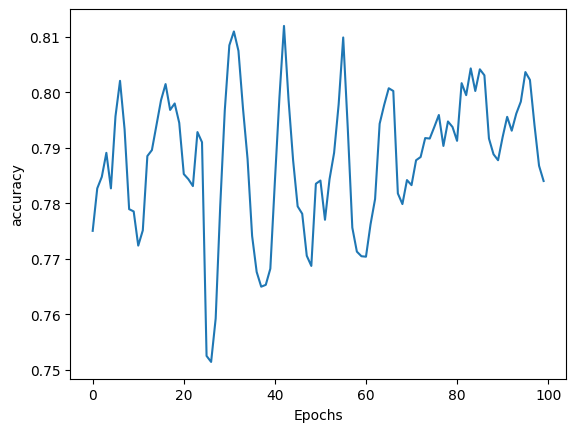

In [76]:
plot_graphs(history, 'accuracy')

In [77]:
seed_test = "I've got a bad feeling about this"
next_word = 100


In [82]:
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list), axis = 1)
  print(predicted)

1/1 [==============================] - 0s 21ms/step
[2]
1/1 [==============================] - 0s 22ms/step
[2]
1/1 [==============================] - 0s 24ms/step
[2]
1/1 [==============================] - 0s 24ms/step
[2]
1/1 [==============================] - 0s 25ms/step
[2]
1/1 [==============================] - 0s 25ms/step
[2]
1/1 [==============================] - 0s 26ms/step
[2]
1/1 [==============================] - 0s 25ms/step
[2]
1/1 [==============================] - 0s 23ms/step
[2]
1/1 [==============================] - 0s 23ms/step
[2]
1/1 [==============================] - 0s 21ms/step
[2]
1/1 [==============================] - 0s 23ms/step
[2]
1/1 [==============================] - 0s 25ms/step
[2]
1/1 [==============================] - 0s 24ms/step
[2]
1/1 [==============================] - 0s 23ms/step
[2]
1/1 [==============================] - 0s 22ms/step
[2]
1/1 [==============================] - 0s 28ms/step
[2]
1/1 [==============================] - 0s 22ms/s

In [86]:
output_word = " "
for word, index in tokenizer.word_index.items():
  if index == predicted:
    output_word = word
    break

print(output_word)

and


In [88]:
seed_text+= " " + output_word
print(seed_text)

I've got a bad feeling about this one at old mind being bent eyes more your love is gone love had gone love had gone as hed treat gone does me dwelling gone and daughter home again kathleen eyes fearless of hair well green tears my jewels throbbing breast i followed with gone and ribbons locks inside together and sounds love gone unseen ballyjamesduff gone love his color gone the ship gone out gone behind it was sinking resemble us holyhead gone the swell ogradys your sentence coaxin as bees gone love had bollin wonders of admiration gone bound gone gone by the love of spancil hill and
